In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import cramers_v, correlation_ratio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
 

 Data Understanding::

In [2]:
#Reading Data 
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
#Check the shape of the dataset
print(" Data Shape \n")
df.shape

 Data Shape 



(19158, 14)

Checking Data Info and Statistical Data::

In [4]:
#Check the data types and null count by columns
print(" Data INFO \n")
df.info()

 Data INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), 

In [5]:
#Check the summary statistics of all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [6]:
#Check the summary statistics of all object columns
df.describe(include = 'object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


Data Cleaning:

In [7]:
#Count the missing values by column in the dataset
print("MISSING VALUES:")
print(df.isna().sum().sort_values(ascending=False))

MISSING VALUES:
company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64


In [8]:
for Columns in ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']:
    df[Columns + "_Imputed"] = df[Columns]
    df[Columns + "_Imputed"].fillna(df[Columns].mode()[0],inplace=True)

#Drop actual columns
df = df.drop(['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'], axis = 1)
   
#reorder the dataframe
df = df[['enrollee_id','city','city_development_index','gender_Imputed','relevent_experience','enrolled_university_Imputed','education_level_Imputed','major_discipline_Imputed','experience_Imputed','company_size_Imputed','company_type_Imputed','last_new_job_Imputed','training_hours','target']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   enrollee_id                  19158 non-null  int64  
 1   city                         19158 non-null  object 
 2   city_development_index       19158 non-null  float64
 3   gender_Imputed               19158 non-null  object 
 4   relevent_experience          19158 non-null  object 
 5   enrolled_university_Imputed  19158 non-null  object 
 6   education_level_Imputed      19158 non-null  object 
 7   major_discipline_Imputed     19158 non-null  object 
 8   experience_Imputed           19158 non-null  object 
 9   company_size_Imputed         19158 non-null  object 
 10  company_type_Imputed         19158 non-null  object 
 11  last_new_job_Imputed         19158 non-null  object 
 12  training_hours               19158 non-null  int64  
 13  target          

visualization

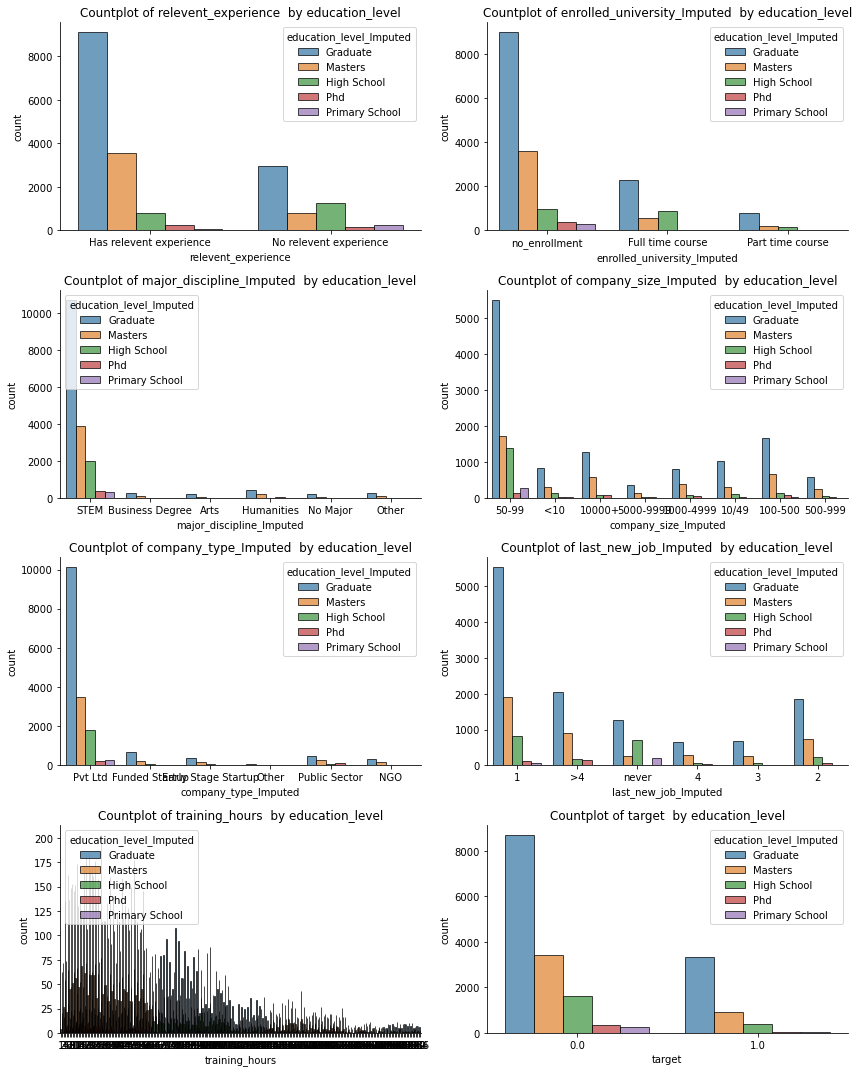

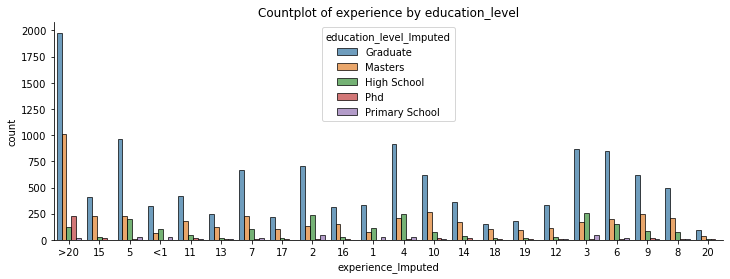

In [10]:
plt.figure(figsize=[12,15])
fet=["relevent_experience","enrolled_university_Imputed","major_discipline_Imputed", "company_size_Imputed","company_type_Imputed","last_new_job_Imputed", "training_hours","target"]
n=1
for r in fet:
    plt.subplot(4,2,n)
    sns.countplot(x=r, hue='education_level_Imputed', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(r))
    n=n+1
plt.tight_layout()
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(x='experience_Imputed', hue='education_level_Imputed',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

In [11]:
df = df.drop(columns=["enrollee_id"])

Exploratory Data Analytics and Data Preprocessing::

1. City:

In [12]:
df.city.nunique()

123

In [13]:
df.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

convert to numerical

In [14]:
df["city"]=df["city"].str.replace('city_','')
df["city"]=df["city"].astype('int64')
df.city.value_counts()

103    4355
21     2702
16     1533
114    1336
160     845
       ... 
129       3
111       3
121       3
140       1
171       1
Name: city, Length: 123, dtype: int64

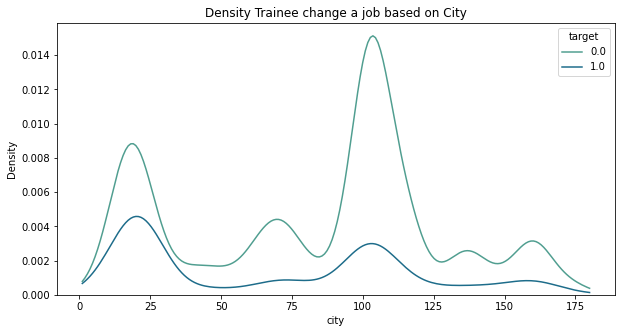

In [15]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="city", hue="target",cut = 0,palette="crest")
plt.title('Density Trainee change a job based on City')
plt.show()

From KDEPlot above ,and the above table, we find that the 'city' feature has upto 123 unique values, and would not contribute much, hence we drop the feature.

In [16]:
df = df.drop(columns=["city"])

2.City Development Index

In [17]:
df.city_development_index.value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

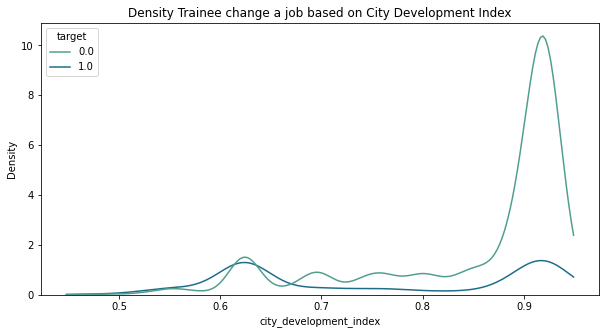

In [18]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette="crest")
plt.title('Density Trainee change a job based on City Development Index')
plt.show()

Based on KDEPlot above, City with higher development index is less likely have trainee who wants to change their job

3. Gender

In [19]:
df.gender_Imputed.value_counts()

Male      17729
Female     1238
Other       191
Name: gender_Imputed, dtype: int64

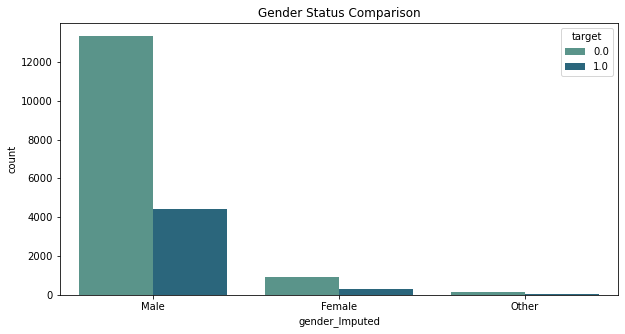

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.gender_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Gender Status Comparison')
plt.show()

Here we see that the number of men is higher than the others.

In [21]:
Marital = ((pd.crosstab(index= df.gender_Imputed, columns= df.target, normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
gender_Imputed,,
Female,73.67,26.33
Other,73.82,26.18
Male,75.18,24.82


We can conclude that,Gender does not show a clear trend in trainee looking for jobs

4.Relevant Experience

In [22]:
df.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

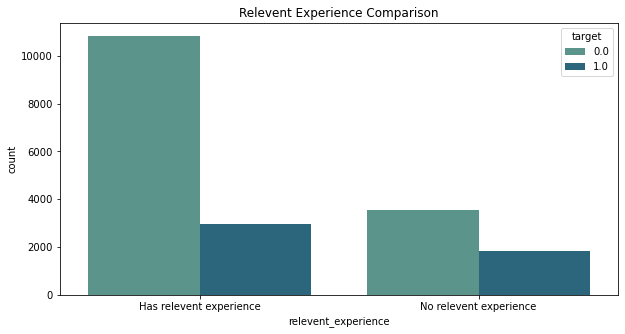

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.relevent_experience,hue=df.target, data=df, palette='crest')
plt.title('Relevent Experience Comparison')
plt.show()

We see that there are more trainee with relevant experience.

In [24]:
Marital = ((pd.crosstab(index= df.relevent_experience, columns= df.target, normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
relevent_experience,,
No relevent experience,66.16,33.84
Has relevent experience,78.53,21.47


Trainee with no experience as Data Science more likely to change job into Data Scientist, with the percentage number 33.84% of all trainee who take the training.

5.Enrolled_university

In [25]:
df.enrolled_university_Imputed.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university_Imputed, dtype: int64

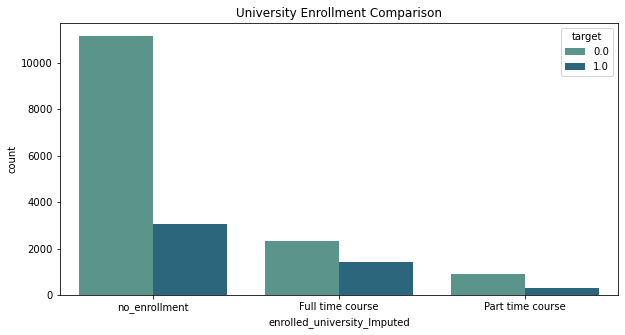

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.enrolled_university_Imputed,hue=df.target, data=df, palette='crest')
plt.title('University Enrollment Comparison')
plt.show()

In [27]:
Marital = ((pd.crosstab(index= df.enrolled_university_Imputed, columns= df.target, normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
enrolled_university_Imputed,,
Full time course,61.91,38.09
Part time course,74.79,25.21
no_enrollment,78.57,21.43


Trainee who take the training Full Course are trainee who have intention to change their job, with percentage 38.09%

6.Education_level

In [28]:
df.education_level_Imputed.value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level_Imputed, dtype: int64

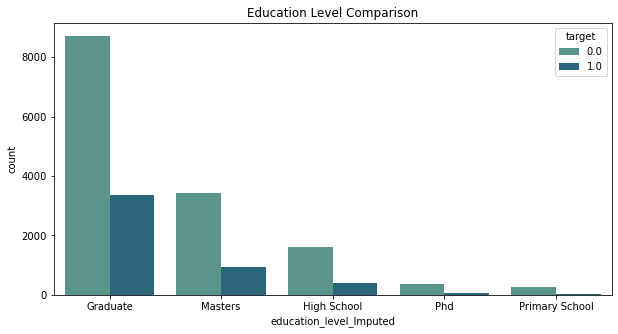

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.education_level_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Education Level Comparison')
plt.show()

In [30]:
Marital = ((pd.crosstab(index= df.education_level_Imputed, columns= df.target, normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
education_level_Imputed,,
Graduate,72.23,27.77
Masters,78.56,21.44
High School,80.47,19.53
Phd,85.99,14.01
Primary School,86.69,13.31


We see the distribution of the education level feature within the data,It consists mostly of graduates.

7.major_discipline

In [31]:
df.major_discipline_Imputed.value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline_Imputed, dtype: int64

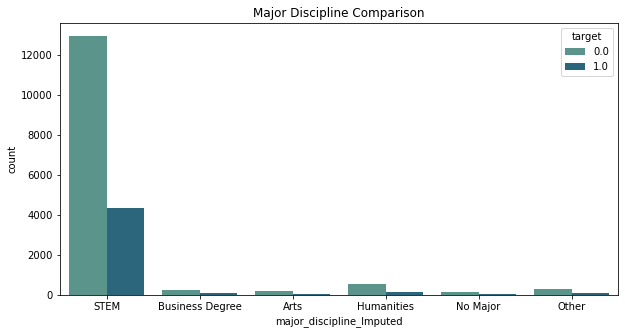

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.major_discipline_Imputed,hue=df.target, data=df, palette='crest')
plt.title('Major Discipline Comparison')
plt.show()

We see that the number of STEMs is quite high compared to others

In [33]:
Marital = ((pd.crosstab(index= df.major_discipline_Imputed, columns= df.target, normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
major_discipline_Imputed,,
Other,73.23,26.77
Business Degree,73.70,26.30
STEM,74.92,25.08
No Major,75.34,24.66
Humanities,78.92,21.08
Arts,79.05,20.95


There are no big differences of trainee who wants to change their job. This is also the reason why Crammer's V showing this feature has small correlation with target

8.experience

In [34]:
df.experience_Imputed.value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience_Imputed, dtype: int64

We see that the number of (experance>20) is quite high compared to others. 

In [35]:
df.experience_Imputed=df.experience_Imputed.replace({'<1' : '0','>20': '21'})
df.experience_Imputed.value_counts()

21    3351
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience_Imputed, dtype: int64

In [36]:
df['experience_Imputed']=df['experience_Imputed'].astype('int64')

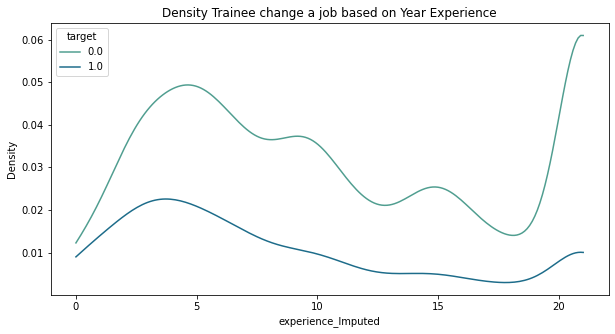

In [37]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="experience_Imputed", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Year Experience')
plt.show()

Trainee with working experience 1 - 5 years are more likely to change their job and the trend is decline afterwards

In [38]:
Marital = ((pd.crosstab(index= df["experience_Imputed"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
experience_Imputed,,
0,54.60,45.40
1,57.56,42.44
3,64.70,35.30
2,66.81,33.19
4,67.43,32.57
7,70.53,29.47
5,71.19,28.81
6,71.79,28.21
8,75.69,24.31


9.Company_size

In [39]:
df.company_size_Imputed.value_counts()

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size_Imputed, dtype: int64

In [40]:
company_size_mapping = {'<10': 1,'10/49': 2,'50-99': 3, '100-500': 4,'500-999': 5,'1000-4999': 6,'5000-9999': 7,'10000+': 8}
df['company_size_Imputed'] = df['company_size_Imputed'].map(company_size_mapping)

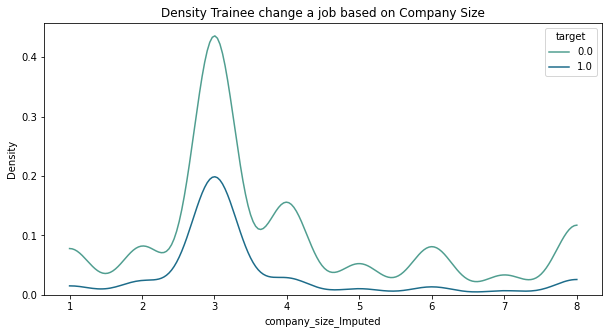

In [41]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="company_size_Imputed", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Company Size')
plt.show()

In [42]:
Marital = ((pd.crosstab(index= df["company_size_Imputed"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
company_size_Imputed,,
3,67.24,32.76
2,76.61,23.39
8,80.93,19.07
7,81.88,18.12
5,82.67,17.33
1,82.87,17.13
4,83.86,16.14
6,84.94,15.06


Trainee who working in company size level 3 which is contains of 50-99 Employee have the highest density to change their job

10.Company_type

In [43]:
df.company_type_Imputed.value_counts()

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type_Imputed, dtype: int64

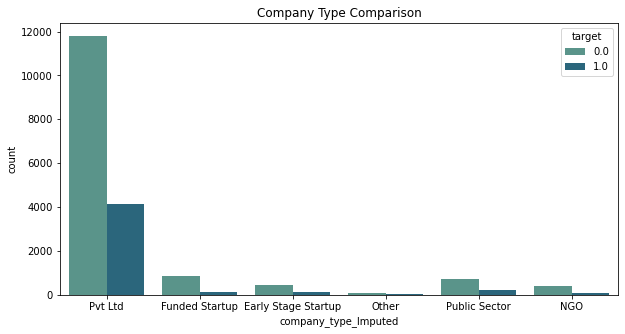

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["company_type_Imputed"],hue=df["target"], data=df, palette='crest')
plt.title('Company Type Comparison')
plt.show()

In [45]:
Marital = ((pd.crosstab(index= df["company_type_Imputed"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
company_type_Imputed,,
Pvt Ltd,73.94,26.06
Other,76.03,23.97
Early Stage Startup,76.45,23.55
Public Sector,78.01,21.99
NGO,81.38,18.62
Funded Startup,86.01,13.99


Trainee who works at private company have the highest percentage of changing job.

11.Last_new_job

In [46]:
df.last_new_job_Imputed.value_counts()

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job_Imputed, dtype: int64

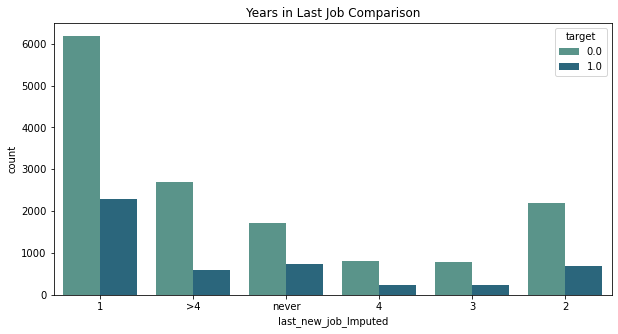

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["last_new_job_Imputed"],hue=df["target"], data=df, palette='crest')
plt.title('Years in Last Job Comparison')
plt.show()

In [48]:
Marital = ((pd.crosstab(index= df["last_new_job_Imputed"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
last_new_job_Imputed,,
never,69.86,30.14
1,73.07,26.93
2,75.86,24.14
3,77.44,22.56
4,77.84,22.16
>4,81.76,18.24


Trainee who are never have job/fresh graduate tend to be Data Scientist after taking the course. Following by trainee who working 1 year in their last job

12.Training_hours

In [49]:
df.training_hours.value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

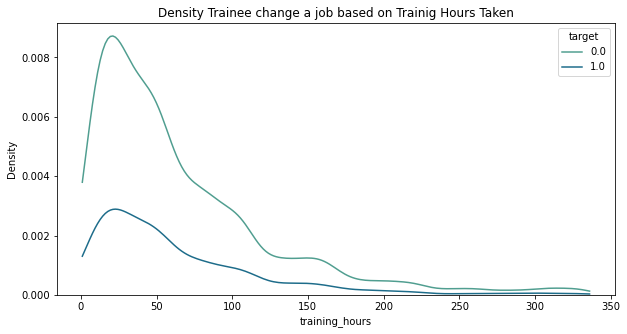

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='crest')
plt.title('Density Trainee change a job based on Trainig Hours Taken')
plt.show()

Trainee who took training up to 25 hours tend to change their job into Data Scientistc.

Checking independency::

In [51]:
#For Correlation Checking
# Crammers V
numerical = df.select_dtypes(['int64', 'float64']).columns.to_list()

assoc_corratio = []
for i in  numerical:
    assoc = round(correlation_ratio(df['target'], df[i]),2)
    assoc_corratio.append(assoc)

In [52]:
df_corr_ratio = pd.DataFrame(data=[assoc_corratio], columns=numerical, index=['target'])

<AxesSubplot:>

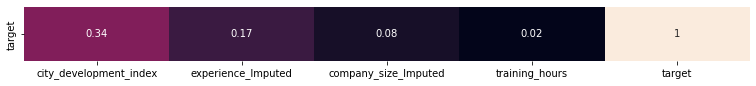

In [53]:
plt.figure(figsize = (13,1))
sns.heatmap(df_corr_ratio, cbar = False, annot=True)

In [54]:
categorical = df.select_dtypes('object').columns.to_list()

assoc_cramers = []
for i in  categorical:
    assoc = round(cramers_v(df['target'], df[i]),2)
    assoc_cramers.append(assoc)

In [55]:
df_cramers_v = pd.DataFrame(data=[assoc_cramers], columns=categorical, index=['target'])

<AxesSubplot:>

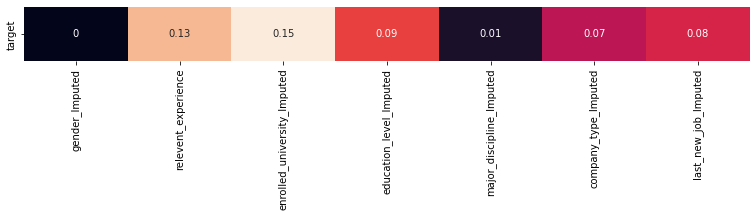

In [56]:
plt.figure(figsize = (13,1))
sns.heatmap(df_cramers_v, cbar = False, annot=True)

I dropped Gender and Major Discipline data feature as there is no big correlation with the target

In [57]:
df = df.drop(columns=["gender_Imputed"])
df = df.drop(columns=["major_discipline_Imputed"])


In [58]:
# Making Dictionaries of ordinal features

relev_exp={
    "No relevent experience":0,
    "Has relevent experience":1
}

enrol_univ={
    "no_enrollment":0,
    "Full time course":1,
    "Part time course":2
}

edu_lev={
    "Primary School":0,
    "High School":1,
    "Graduate":2,
    "Masters":3,
    "Phd":4
}


expre={
    ">20":21,
    "<1":0
}


company_type={
    "Pvt Ltd":0,
    "Funded Startup":1, 
    "Early Stage Startup":2, 
    "Other":3, 
    "Public Sector":4, 
    "NGO":5
}

las_job={
    "never":0,
    "1":1,
    "2":2,
    "3":3,
    "4":4,
    ">4":5
}


In [59]:
# Transforming Categorical features into numarical features

df["relevent_experience"]=df["relevent_experience"].map(relev_exp)
df["enrolled_university_Imputed"]=df["enrolled_university_Imputed"].map(enrol_univ)

df["education_level_Imputed"]=df["education_level_Imputed"].map(edu_lev)

df["experience_Imputed"]=df["experience_Imputed"].map(lambda x:float(x))
df["experience_Imputed"]=df["experience_Imputed"].replace(expre)

df["last_new_job_Imputed"]=df["last_new_job_Imputed"].map(las_job)

df["company_type_Imputed"]=df["company_type_Imputed"].map(company_type)

In [60]:
X = df.drop(columns='target')
Y = df['target']

Handling Imbalance in Data

In [61]:

num_0 = len(df[df['target']==0])
num_1 = len(df[df['target']==1])

print('Number of The minority sample:',num_0,'\n''Number of The majority sample',num_1)
#df2=pd.concat([df[df['target']==0].sample(num_1) , df[df['target']==1] ])


Number of The minority sample: 14381 
Number of The majority sample 4777


<AxesSubplot:xlabel='target', ylabel='count'>

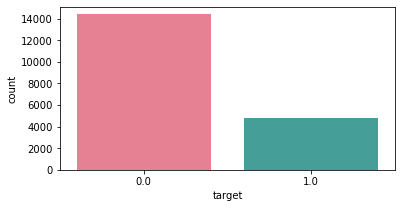

In [62]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='target', palette ='husl')

We use SMOTE to oversample the imbalanced class

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
X_smote, Y_smote = smote.fit_resample(X,Y)

num_0 = X_smote.shape[0]
num_1 =Y_smote.shape[0]

print('Number of The minority sample:',num_0,'\n''Number of The majority sample',num_1)



Number of The minority sample: 28762 
Number of The majority sample 28762


Modelling

In [64]:
#Splitting the train-test
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=.80,random_state=42)

In [65]:
#Scaling the data using standardization
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)



Testing Results:

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2880
         1.0       0.56      0.26      0.35       952

    accuracy                           0.76      3832
   macro avg       0.67      0.60      0.61      3832
weighted avg       0.73      0.76      0.73      3832



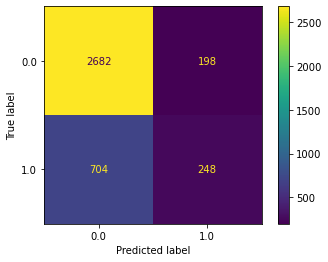

In [66]:
# Initiatlize the model
model_lr= LogisticRegression()

# Fit the model
model_lr.fit(scaled_X_train, y_train)

# Predict data points 
y_pred_test = model_lr.predict(scaled_X_test)
accuracy_score(y_test,y_pred_test)
plot_confusion_matrix(model_lr,scaled_X_test,y_test)
# Print accuracy scores

print("\n\nTesting Results:\n")
print(classification_report(y_test,y_pred_test))

We get an accuracy score of 76%.

In [67]:

model=RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.score(x_test, y_test)


0.7659185803757829

In [68]:
# model accuracy
result = []

random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)

random_forest_model.fit(x_train, y_train)

y_pred_random_forest = random_forest_model.predict(x_test)

cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)

acc_random_forest = accuracy_score(y_test, y_pred_random_forest)

result.append(acc_random_forest)

print("RESULT")

print("Random Forest Model Acc : ",acc_random_forest)

RESULT
Random Forest Model Acc :  0.7745302713987474


In [69]:
forest = RandomForestClassifier(max_samples=0.01)
forest.fit(x_train, y_train)
ypred_tr = forest.predict(x_train)
ypred_ts = forest.predict(x_test)
print("Training Results:\n")
print(classification_report(y_train, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts))

Training Results:

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87     11501
         1.0       0.61      0.36      0.45      3825

    accuracy                           0.78     15326
   macro avg       0.71      0.64      0.66     15326
weighted avg       0.76      0.78      0.76     15326



Testing Results:

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2880
         1.0       0.57      0.34      0.43       952

    accuracy                           0.77      3832
   macro avg       0.69      0.63      0.64      3832
weighted avg       0.75      0.77      0.75      3832



We get an accuracy score of 77%